# WeatherPy

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "outputs/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

# API Calls

In [3]:
# save info from api_keys
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# build partial query URL
query_url = f'{url}&units={units}&appid={weather_api_key}&q='

In [4]:
# perform weather check using series of API calls

# set list for loop call:
city_data=[]
city_lat=[]
city_lng=[]
city_max_temp=[]
city_humidity=[]
city_clouds=[]
city_wind=[]
city_country=[]
city_date=[]

# print to log
print("commencing data retrieval      ")
print('-------------------------------')

# create counter for print log
record_count = 1 
set_count = 1

#loop through cities in list and perform request
for i, city in enumerate(cities):
    city_url = query_url + city
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
#   print records with set numbers and counters
    print('Processing record %s of set %s | %s' % (record_count, set_count, city))
    # add 1 to the record count for printing
    record_count += 1
    
    try:
        # make request and store in json
        response = requests.get(city_url).json()
        
        city_data.append(response['name'])
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        city_max_temp.append(response['main']['temp_max'])
        city_humidity.append(response['main']['humidity'])
        city_clouds.append(response['clouds']['all'])
        city_wind.append(response['wind']['speed'])
        city_country.append(response['sys']['country'])
        city_date.append(response['dt'])
        
        # sleep for 2 seconds to prevent api from being locked
        time.sleep(2)
        
    # handle exceptions for error, skip city
    except:
        print('city not found. skipping...')
        pass
    
print('-------------------------------')
print('data retrieved                 ')
print('-------------------------------')

commencing data retrieval      
-------------------------------
Processing record 1 of set 1 | grindavik
Processing record 2 of set 1 | kapaa
Processing record 3 of set 1 | yeppoon
Processing record 4 of set 1 | georgetown
Processing record 5 of set 1 | jamestown
Processing record 6 of set 1 | ushuaia
Processing record 7 of set 1 | ancud
Processing record 8 of set 1 | new norfolk
Processing record 9 of set 1 | saint george
Processing record 10 of set 1 | albany
Processing record 11 of set 1 | rikitea
Processing record 12 of set 1 | busselton
Processing record 13 of set 1 | port alfred
Processing record 14 of set 1 | punta arenas
Processing record 15 of set 1 | bengkulu
Processing record 16 of set 1 | owen sound
Processing record 17 of set 1 | bredasdorp
Processing record 18 of set 1 | quang ngai
Processing record 19 of set 1 | balkanabat
Processing record 20 of set 1 | urucui
Processing record 21 of set 1 | attawapiskat
city not found. skipping...
Processing record 22 of set 1 | belush

Processing record 38 of set 4 | merauke
Processing record 39 of set 4 | yatou
Processing record 40 of set 4 | catuday
Processing record 41 of set 4 | sfantu gheorghe
Processing record 42 of set 4 | tres arroyos
Processing record 43 of set 4 | ribeira grande
Processing record 44 of set 4 | atuona
Processing record 45 of set 4 | surgut
Processing record 46 of set 4 | leon
Processing record 47 of set 4 | malwan
city not found. skipping...
Processing record 48 of set 4 | igarka
Processing record 49 of set 4 | rach gia
Processing record 0 of set 5 | guaratuba
Processing record 1 of set 5 | rawson
Processing record 2 of set 5 | puerto ayora
Processing record 3 of set 5 | san quintin
Processing record 4 of set 5 | itoman
Processing record 5 of set 5 | cambyreta
city not found. skipping...
Processing record 6 of set 5 | libourne
Processing record 7 of set 5 | akyab
Processing record 8 of set 5 | palmer
Processing record 9 of set 5 | dudinka
Processing record 10 of set 5 | jaisalmer
Processing 

Processing record 28 of set 8 | wazzan
city not found. skipping...
Processing record 29 of set 8 | kingori
Processing record 30 of set 8 | nabire
Processing record 31 of set 8 | moose factory
Processing record 32 of set 8 | aykhal
Processing record 33 of set 8 | carballo
Processing record 34 of set 8 | sakakah
Processing record 35 of set 8 | egvekinot
Processing record 36 of set 8 | phan thiet
Processing record 37 of set 8 | jizan
Processing record 38 of set 8 | shimoda
Processing record 39 of set 8 | chegutu
Processing record 40 of set 8 | palauig
Processing record 41 of set 8 | beringovskiy
Processing record 42 of set 8 | shatsk
Processing record 43 of set 8 | bhinga
Processing record 44 of set 8 | lahat
Processing record 45 of set 8 | markova
Processing record 46 of set 8 | asau
Processing record 47 of set 8 | ahipara
Processing record 48 of set 8 | morro bay
Processing record 49 of set 8 | yambio
Processing record 0 of set 9 | kamenskoye
city not found. skipping...
Processing recor

Processing record 20 of set 12 | kazerun
Processing record 21 of set 12 | vredendal
Processing record 22 of set 12 | trelew
Processing record 23 of set 12 | tiarei
Processing record 24 of set 12 | tumarbong
Processing record 25 of set 12 | ukiah
Processing record 26 of set 12 | tabou
Processing record 27 of set 12 | napanee
Processing record 28 of set 12 | tungkang
city not found. skipping...
Processing record 29 of set 12 | caxito
Processing record 30 of set 12 | caucasia
Processing record 31 of set 12 | eyl
Processing record 32 of set 12 | bell ville
Processing record 33 of set 12 | soria
Processing record 34 of set 12 | itabira
Processing record 35 of set 12 | zaprudnya
Processing record 36 of set 12 | polewali
Processing record 37 of set 12 | qibili
city not found. skipping...
Processing record 38 of set 12 | macau
Processing record 39 of set 12 | cutervo
Processing record 40 of set 12 | galveston
Processing record 41 of set 12 | tilichiki
Processing record 42 of set 12 | upington


# Convert raw data to DataFrame

In [6]:
# create dataframe for cities data
city_data_df = {
    'City': city_data,
    'Lat': city_lat,
    'Lng': city_lng,
    'Max Temp': city_max_temp,
    'Humidity': city_humidity,
    'Cloudiness': city_clouds,
    'Wind Speed': city_wind,
    'Country': city_country,
    'Date': city_date
}

weather_df = pd.DataFrame(city_data_df)
weather_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [7]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grindavik,63.8424,-22.4338,52.27,71,75,9.22,IS,1660414090
1,Kapaa,22.0752,-159.3190,78.78,82,40,10.36,US,1660414092
2,Yeppoon,-23.1333,150.7333,56.98,89,42,4.38,AU,1660413804
3,George Town,5.4112,100.3354,80.89,82,20,3.44,MY,1660413605
4,Jamestown,42.0970,-79.2353,79.02,35,20,10.36,US,1660413741


In [8]:
weather_df.to_csv(output_data_file, index=False, header=True)

In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,18.360279,14.929985,70.471184,69.104240,56.916961,8.095177,1.660415e+09
std,33.154709,91.019859,14.419436,22.302778,37.497023,5.605054,4.837477e+02
min,-54.800000,-179.166700,32.900000,8.000000,0.000000,0.000000,1.660414e+09
25%,-8.550550,-65.051725,58.922500,54.250000,20.000000,4.012500,1.660414e+09
50%,20.400100,19.584650,73.230000,74.000000,64.500000,6.800000,1.660415e+09
75%,45.471725,95.621450,80.587500,87.000000,95.750000,11.130000,1.660415e+09
max,78.218600,179.316700,109.980000,100.000000,100.000000,31.230000,1.660415e+09


# Inspect data and remove cities where humidity > 100%

In [11]:
weather_df.loc[weather_df['Humidity'] >= 100]['Humidity'].count()

8

In [12]:
cleaned_weather_df = weather_df.loc[weather_df['Humidity'] < 100]

In [14]:
len(cleaned_weather_df)

558

In [15]:
cleaned_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,18.203857,14.588206,70.591290,68.661290,56.720430,8.123047,1.660415e+09
std,33.117552,90.581136,14.413495,22.150659,37.453991,5.624149,4.847352e+02
min,-54.800000,-179.166700,32.900000,8.000000,0.000000,0.000000,1.660414e+09
25%,-8.720325,-65.051725,58.995000,54.000000,20.000000,4.012500,1.660414e+09
50%,20.277600,18.998700,73.310000,74.000000,64.000000,6.865000,1.660415e+09
75%,45.192700,95.183300,80.630000,87.000000,95.000000,11.170000,1.660415e+09
max,78.218600,179.316700,109.980000,99.000000,100.000000,31.230000,1.660415e+09


In [17]:
# retrive indics of cities with humidity over 100%
over_100 = weather_df[weather_df.Humidity > 100].index
over_100

Int64Index([], dtype='int64')

In [19]:
# Make new DataFrame equal to city data to drop all humidity outliers by index
cleaned_city_data = weather_df
for x in over_100:
    cleaned_city_data = weather_df.drop([x])
cleaned_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grindavik,63.8424,-22.4338,52.27,71,75,9.22,IS,1660414090
1,Kapaa,22.0752,-159.3190,78.78,82,40,10.36,US,1660414092
2,Yeppoon,-23.1333,150.7333,56.98,89,42,4.38,AU,1660413804
3,George Town,5.4112,100.3354,80.89,82,20,3.44,MY,1660413605
4,Jamestown,42.0970,-79.2353,79.02,35,20,10.36,US,1660413741
...,...,...,...,...,...,...,...,...,...
561,Vanderhoof,54.0166,-124.0198,67.12,69,99,7.47,CA,1660415103
562,Cotonou,6.3654,2.4183,76.98,88,20,12.66,BJ,1660415403
563,Abapó,-18.8333,-63.4667,84.97,29,41,6.55,BO,1660415406
564,Gallup,35.5281,-108.7426,81.01,37,0,9.22,US,1660415170


In [22]:
# extract relevant fields from cleaned dataframe
lat = cleaned_city_data.Lat
max_temp = cleaned_city_data ['Max Temp']
humid = cleaned_city_data.Humidity
cloud = cleaned_city_data.Cloudiness
wind = cleaned_city_data['Wind Speed']

# export clean_city_data into csv file
cleaned_city_data.to_csv('outputs/cleaned_city_data.csv', index = False, header = True)

# Plotting Data

## Latitude vs. Temperature Plot

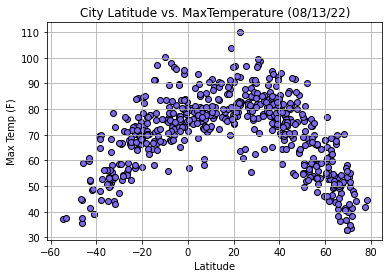

In [27]:
x_values = lat
y_values = max_temp

plt.scatter(x_values,y_values, marker = 'o', facecolor = 'mediumslateblue', edgecolor = 'black')

plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title ("City Latitude vs. Max Temperature (%s)" % time.strftime('%x'))
plt.grid()
plt.savefig('images/lat_vs_temp.png')
plt.show()

## Latitude vs. Humidity Plot

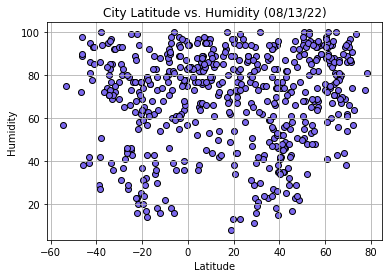

In [30]:
x_values = lat
y_values = humid

plt.scatter(x_values, y_values, marker = 'o', facecolor = 'mediumslateblue', edgecolor = 'black')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.grid()
plt.savefig('images/lat_vs_humid.jpg')
plt.show()

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

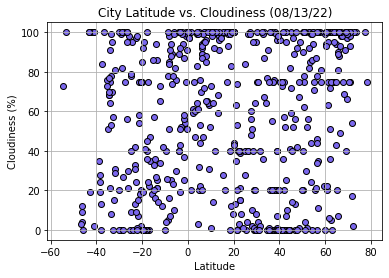

In [31]:
x_values = lat
y_values = cloud

plt.scatter(x_values, y_values, marker='o', facecolor='mediumslateblue', edgecolor='black')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.grid()
plt.savefig('images/lat_vs_cloud.png')
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

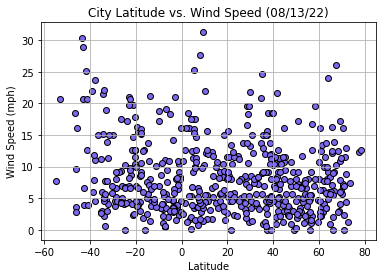

In [32]:
x_values = lat
y_values = wind

plt.scatter(x_values, y_values, marker='o', facecolor='mediumslateblue', edgecolor='black')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.grid()
plt.savefig('images/lat_vs_wind.png')
plt.show

## Linear Regression

In [33]:
northern_hemisphere = cleaned_city_data.loc[cleaned_city_data['Lat'] >=0]
southern_hemisphere = cleaned_city_data.loc[cleaned_city_data['Lat'] < 0]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

p-value = 5.98993473762751e-54
r-value = -0.6869887907374209


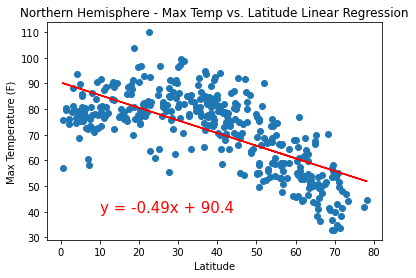

In [35]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate (line_eq, (10, 40), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f'p-value = {pvalue}')
print(f'r-value = {rvalue}')

plt.savefig('images/north_temp_regress.png')
plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression 

p-value = 1.9088116725029906e-36
r-value = 0.7573057446153826


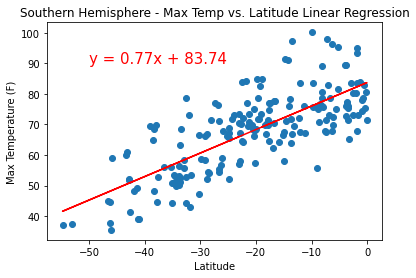

In [37]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate (line_eq, (-50, 90), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f'p-value = {pvalue}')
print(f'r-value = {rvalue}')

plt.savefig('images/south_temp_regress.png')
plt.show()

## Comparing linear regression of temperatures at changing latitudes in the northern vs. southern hemispheres:

  The linear regression is modeling what happens to temperatures as latitude increases in the northern and southern hemispheres. Latitude increases the further away you move from the equator in the northern hemisphere and vice-versa in the southern hemisphere. In the northern hemisphere there is a significant negative correlation between latitude an max temperature, while the opposite is seen in the southern hemisphere, there is a positive correlation between increasing latitude and max temperature.

### Northern Hemisphere - Humidity (%) vs Latitude Linear Regression

p-value = 0.5238669986964267
r-value = 0.03292800051815778


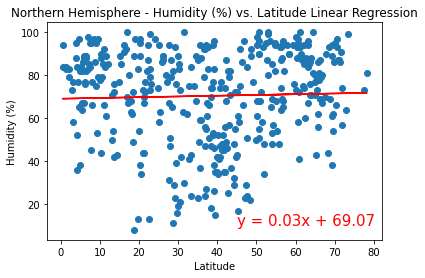

In [46]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate (line_eq, (45, 10), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

print(f'p-value = {pvalue}')
print(f'r-value = {rvalue}')

plt.savefig('images/north_humid_regress.png')
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

p-value = 0.7077456731498544
r-value = -0.027445839472493416


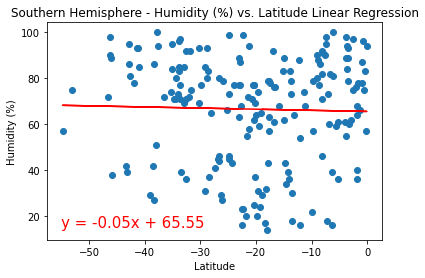

In [50]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate (line_eq, (-55, 15), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

print(f'p-value = {pvalue}')
print(f'r-value = {rvalue}')

plt.savefig('images/south_humid_regress.png')
plt.show()

### Comparing linear regression of humidity at changing latitudes in the northern vs. southern hemispheres:
 The linear regression is modeling what happens to humidity as latitude increases in the northern and southern hemispheres. The high p-values (<.5) and low r-values indicate that there is no significant correlation between latitude and humidity in either hemisphere.

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

p-value = 0.18417875903962425
r-value = 0.06854252868214618


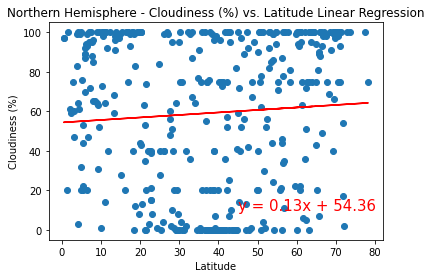

In [54]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate (line_eq, (45, 10), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

print(f'p-value = {pvalue}')
print(f'r-value = {rvalue}')

plt.savefig('images/north_cloud_regress.png')
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

p-value = 0.22199312099163393
r-value = 0.08924721510739352


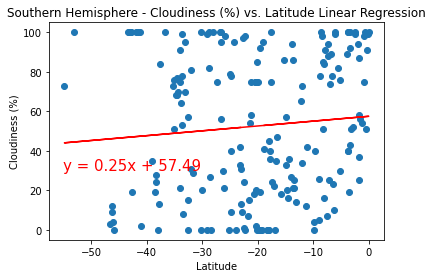

In [57]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate (line_eq, (-55, 30), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

print(f'p-value = {pvalue}')
print(f'r-value = {rvalue}')

plt.savefig('images/south_cloud_regress.png')
plt.show()

### Comparing linear regression of cloudiness at changing latitudes in the northern vs. southern hemispheres

The linear regression is modeling what happens to cloudiness as latitudes increase in the northern and southern hemispheres. The low p-values of both regressions indicate that there is little to no correlation between latitude and cloudiness.

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

p-value = 0.04808939598802677
r-value = -0.10187223594980209


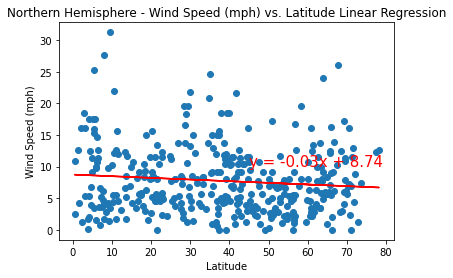

In [58]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate (line_eq, (45, 10), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

print(f'p-value = {pvalue}')
print(f'r-value = {rvalue}')

plt.savefig('images/north_wind_regress.png')
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression

p-value = 0.00012272915110459013
r-value = -0.2757565379586431


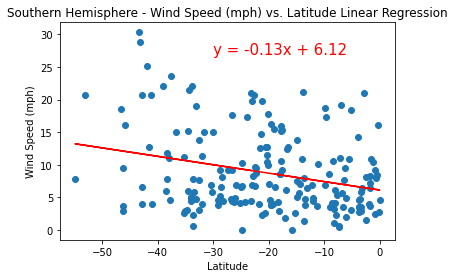

In [60]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate (line_eq, (-30, 27), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

print(f'p-value = {pvalue}')
print(f'r-value = {rvalue}')

plt.savefig('images/south_wind_regress.png')
plt.show()

### Comparing linear regression of wind speed at changing latitudes in the northern vs. southern hemisphere

The linear regressino is modeling what happens to wind speed as latitudes increase in the northern and southern hemispheres. The low p-value of the northern hemisphere regression indicates that there is some negative correlation between wind speeds and distance from the equator. The low p-value of the southern hemisphere regression also indicates that there is a negative correlation between wind speed and distance from the equator in the southern hemisphere.

## Three observable trends based on data:
- Regions that are close to the equator in both the northern and southern hemispheres experiences higher temperatures than regions further from the equator. This trend is shown in the 'Max Temp vs. Latitude Linear Regression' plots for both the northern and southern hemispheres.
- Wind speed in both hemispheres are typically below 20 miles an hour, regardless of latitude. This is reasonable given that wind speed is determinded by pressure differentials in regions and not latitude.
- Similar to wind speed, cloudiness across both hemispheres displayed no pattern based on latitude